In [1]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2020, 3, 7, 9, 1, 56, 982720)

In [4]:
now.year, now.month, now.day

(2020, 3, 7)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [7]:
from datetime import timedelta

In [8]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']

In [15]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs ]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse

In [18]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In [20]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [21]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00 ']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [22]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]

NaT

In [24]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 时间序列基础

In [25]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [26]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.803701
2011-01-05    1.189286
2011-01-07   -1.994055
2011-01-08    0.585028
2011-01-10   -1.141228
2011-01-12   -0.964535
dtype: float64

In [27]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
ts + ts[::2]

2011-01-02    1.607401
2011-01-05         NaN
2011-01-07   -3.988109
2011-01-08         NaN
2011-01-10   -2.282456
2011-01-12         NaN
dtype: float64

In [31]:
ts.index.dtype

dtype('<M8[ns]')

In [32]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [33]:
stamp = ts.index[2]
ts[stamp]

-1.9940545170536779

In [36]:
ts['1/10/2011']

-1.1412281894619807

In [37]:
ts['20110110']

-1.1412281894619807

In [38]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.351708
2000-01-02   -0.022508
2000-01-03    0.270681
2000-01-04    1.435739
2000-01-05    1.112865
                ...   
2002-09-22    0.183246
2002-09-23    0.708260
2002-09-24    0.449762
2002-09-25   -1.555996
2002-09-26   -0.278969
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts['2001']

2001-01-01    1.023805
2001-01-02    1.388734
2001-01-03   -1.807358
2001-01-04   -0.336776
2001-01-05   -1.491126
                ...   
2001-12-27   -0.632046
2001-12-28    0.420768
2001-12-29   -0.834121
2001-12-30   -0.704883
2001-12-31    0.280659
Freq: D, Length: 365, dtype: float64

In [43]:
longer_ts['2001-05']

2001-05-01    0.230806
2001-05-02    0.880781
2001-05-03   -0.049536
2001-05-04    0.838985
2001-05-05    0.748463
2001-05-06   -0.206787
2001-05-07    0.147640
2001-05-08   -0.544522
2001-05-09   -0.687694
2001-05-10   -0.174427
2001-05-11    0.810283
2001-05-12    0.985343
2001-05-13    0.832922
2001-05-14    1.029784
2001-05-15    0.713880
2001-05-16   -0.975668
2001-05-17    0.062840
2001-05-18   -1.011423
2001-05-19   -1.676616
2001-05-20    0.065634
2001-05-21   -2.582624
2001-05-22   -0.315461
2001-05-23   -1.110734
2001-05-24    1.032345
2001-05-25   -0.768216
2001-05-26   -0.502984
2001-05-27   -1.397957
2001-05-28   -1.752118
2001-05-29    0.910227
2001-05-30   -2.231837
2001-05-31   -0.296623
Freq: D, dtype: float64

In [46]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.994055
2011-01-08    0.585028
2011-01-10   -1.141228
2011-01-12   -0.964535
dtype: float64

In [47]:
ts

2011-01-02    0.803701
2011-01-05    1.189286
2011-01-07   -1.994055
2011-01-08    0.585028
2011-01-10   -1.141228
2011-01-12   -0.964535
dtype: float64

In [48]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.994055
2011-01-08    0.585028
2011-01-10   -1.141228
dtype: float64

In [51]:
ts.truncate(after='1/9/2011')

2011-01-02    0.803701
2011-01-05    1.189286
2011-01-07   -1.994055
2011-01-08    0.585028
dtype: float64

In [55]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = dates,
                       columns=['Colorado', 'Texas',
                                 'New York', 'Ohio'])

In [58]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.020586,-0.330761,0.580937,-0.370817
2001-05-09,-1.164377,-0.411863,-0.291448,-0.514398
2001-05-16,0.280705,-0.336987,-1.086485,-0.246207
2001-05-23,-0.307294,0.882750,1.326723,-1.802958
2001-05-30,0.805814,0.897833,0.611912,-1.017799


In [60]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)

In [61]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [62]:
dup_ts.index.is_unique

False

In [63]:
dup_ts['1/3/2000']

4

In [64]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [65]:
grouped = dup_ts.groupby(level=0)

In [66]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期的范围、频率以及移动

In [68]:
ts

2011-01-02    0.803701
2011-01-05    1.189286
2011-01-07   -1.994055
2011-01-08    0.585028
2011-01-10   -1.141228
2011-01-12   -0.964535
dtype: float64

In [69]:
resampler = ts.resample('D')

In [71]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [72]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [76]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [80]:
from pandas.tseries.offsets import Hour, Minute

In [81]:
hour = Hour()
hour

<Hour>

In [83]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [87]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [88]:
Hour(2) + Minute(30)

<150 * Minutes>

In [89]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [91]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [92]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [93]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [94]:
ts

2000-01-31    0.736631
2000-02-29   -0.525436
2000-03-31   -0.312779
2000-04-30   -0.077976
Freq: M, dtype: float64

In [95]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.736631
2000-04-30   -0.525436
Freq: M, dtype: float64

In [96]:
ts.shift(-2)

2000-01-31   -0.312779
2000-02-29   -0.077976
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [97]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.713297
2000-03-31   -0.404724
2000-04-30   -0.750699
Freq: M, dtype: float64

In [100]:
ts.shift(2, freq='M')

2000-03-31    0.736631
2000-04-30   -0.525436
2000-05-31   -0.312779
2000-06-30   -0.077976
Freq: M, dtype: float64

In [101]:
ts.shift(3, freq='D')

2000-02-03    0.736631
2000-03-03   -0.525436
2000-04-03   -0.312779
2000-05-03   -0.077976
dtype: float64

In [102]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.736631
2000-02-29 01:30:00   -0.525436
2000-03-31 01:30:00   -0.312779
2000-04-30 01:30:00   -0.077976
Freq: M, dtype: float64

In [103]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)

In [104]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [105]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [106]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [107]:
offset = MonthEnd()

In [110]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [111]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [112]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [113]:
ts

2000-01-15    1.425544
2000-01-19   -0.106665
2000-01-23    0.337599
2000-01-27    0.296042
2000-01-31    0.795935
2000-02-04   -1.135863
2000-02-08    0.329087
2000-02-12   -0.735872
2000-02-16    0.001088
2000-02-20   -0.618492
2000-02-24   -0.966321
2000-02-28   -0.209746
2000-03-03   -0.531632
2000-03-07   -1.650316
2000-03-11   -2.022981
2000-03-15   -0.884622
2000-03-19    0.049300
2000-03-23   -0.456133
2000-03-27    0.961530
2000-03-31   -0.972649
Freq: 4D, dtype: float64

In [114]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.549691
2000-02-29   -0.476588
2000-03-31   -0.688438
dtype: float64

In [116]:
ts.resample("M").mean()

2000-01-31    0.549691
2000-02-29   -0.476588
2000-03-31   -0.688438
Freq: M, dtype: float64

## 11.4 时区处理

In [117]:
import pytz

In [119]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [120]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [122]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [123]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [124]:
ts

2012-03-09 09:30:00   -0.546729
2012-03-10 09:30:00   -0.797207
2012-03-11 09:30:00   -0.095092
2012-03-12 09:30:00    2.079250
2012-03-13 09:30:00   -0.143500
2012-03-14 09:30:00   -0.368399
Freq: D, dtype: float64

In [126]:
print(ts.index.tz)

None


In [127]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [128]:
ts

2012-03-09 09:30:00   -0.546729
2012-03-10 09:30:00   -0.797207
2012-03-11 09:30:00   -0.095092
2012-03-12 09:30:00    2.079250
2012-03-13 09:30:00   -0.143500
2012-03-14 09:30:00   -0.368399
Freq: D, dtype: float64

In [129]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00   -0.546729
2012-03-10 09:30:00+00:00   -0.797207
2012-03-11 09:30:00+00:00   -0.095092
2012-03-12 09:30:00+00:00    2.079250
2012-03-13 09:30:00+00:00   -0.143500
2012-03-14 09:30:00+00:00   -0.368399
Freq: D, dtype: float64

In [130]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [131]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.546729
2012-03-10 04:30:00-05:00   -0.797207
2012-03-11 05:30:00-04:00   -0.095092
2012-03-12 05:30:00-04:00    2.079250
2012-03-13 05:30:00-04:00   -0.143500
2012-03-14 05:30:00-04:00   -0.368399
Freq: D, dtype: float64

In [132]:
ts_eastern = ts.tz_localize('America/New_York')

In [133]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.546729
2012-03-10 14:30:00+00:00   -0.797207
2012-03-11 13:30:00+00:00   -0.095092
2012-03-12 13:30:00+00:00    2.079250
2012-03-13 13:30:00+00:00   -0.143500
2012-03-14 13:30:00+00:00   -0.368399
Freq: D, dtype: float64

In [134]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.546729
2012-03-10 15:30:00+01:00   -0.797207
2012-03-11 14:30:00+01:00   -0.095092
2012-03-12 14:30:00+01:00    2.079250
2012-03-13 14:30:00+01:00   -0.143500
2012-03-14 14:30:00+01:00   -0.368399
Freq: D, dtype: float64

In [139]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [140]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [142]:
stamp_utc = stamp.tz_localize("UTC")

In [144]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [145]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [146]:
stamp_utc.value

1299902400000000000

In [147]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [148]:
from pandas.tseries.offsets import Hour

In [149]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [150]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [151]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [152]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [155]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [156]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [157]:
ts

2012-03-07 09:30:00    0.915120
2012-03-08 09:30:00   -0.482961
2012-03-09 09:30:00   -0.521067
2012-03-12 09:30:00    0.540812
2012-03-13 09:30:00    1.368669
2012-03-14 09:30:00   -0.782814
2012-03-15 09:30:00   -0.263759
2012-03-16 09:30:00   -1.260159
2012-03-19 09:30:00    0.620307
2012-03-20 09:30:00   -0.586527
Freq: B, dtype: float64

In [158]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts1.indx

2012-03-07 09:30:00+00:00    0.915120
2012-03-08 09:30:00+00:00   -0.482961
2012-03-09 09:30:00+00:00   -0.521067
2012-03-12 09:30:00+00:00    0.540812
2012-03-13 09:30:00+00:00    1.368669
2012-03-14 09:30:00+00:00   -0.782814
2012-03-15 09:30:00+00:00   -0.263759
Freq: B, dtype: float64

In [165]:
ts2

2012-03-09 13:30:00+04:00   -0.521067
2012-03-12 13:30:00+04:00    0.540812
2012-03-13 13:30:00+04:00    1.368669
2012-03-14 13:30:00+04:00   -0.782814
2012-03-15 13:30:00+04:00   -0.263759
Freq: B, dtype: float64

In [160]:
result = ts1 + ts2

In [162]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 时期及其算术运算

In [166]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [167]:
p + 5

Period('2012', 'A-DEC')

In [168]:
p - 2 

Period('2005', 'A-DEC')

In [169]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [171]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [172]:
pd.Series(np.random.randn(6), index=rng)

2000-01    1.729432
2000-02   -1.222639
2000-03    0.047733
2000-04    1.765335
2000-05   -0.451520
2000-06    1.069055
Freq: M, dtype: float64

In [173]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [174]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [175]:
p.asfreq("M", how="start")

Period('2007-01', 'M')

In [176]:
p.asfreq("M", how="end")

Period('2007-12', 'M')

In [177]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [178]:
p.asfreq("M", "start")

Period('2006-07', 'M')

In [179]:
p.asfreq("M", "end")

Period('2007-06', 'M')

In [180]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [181]:
p.asfreq("A-JUN")

Period('2008', 'A-JUN')

In [182]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [183]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.648956
2007    1.040437
2008    0.042616
2009    0.742684
Freq: A-DEC, dtype: float64

In [184]:
ts.asfreq("M", how="start")

2006-01   -0.648956
2007-01    1.040437
2008-01    0.042616
2009-01    0.742684
Freq: M, dtype: float64

In [185]:
ts.asfreq("B", how="end")

2006-12-29   -0.648956
2007-12-31    1.040437
2008-12-31    0.042616
2009-12-31    0.742684
Freq: B, dtype: float64

In [186]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [187]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [188]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [189]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [190]:
p4pm

Period('2012-01-30 16:00', 'T')

In [191]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [192]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN' )
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [193]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [194]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [195]:
ts.index = new_rng.to_timestamp()

In [196]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将Timestamp转换为Period（及其反向过程）

In [197]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [198]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.546555
2000-02-29   -1.033448
2000-03-31   -0.498871
Freq: M, dtype: float64

In [199]:
pts = ts.to_period()
pts

2000-01   -0.546555
2000-02   -1.033448
2000-03   -0.498871
Freq: M, dtype: float64

In [200]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.058366
2000-01-30    0.344850
2000-01-31   -1.001777
2000-02-01   -1.064171
2000-02-02   -0.229085
2000-02-03   -0.009306
Freq: D, dtype: float64

In [202]:
ts2.to_period('M')

2000-01   -0.058366
2000-01    0.344850
2000-01   -1.001777
2000-02   -1.064171
2000-02   -0.229085
2000-02   -0.009306
Freq: M, dtype: float64

In [205]:
pts = ts2.to_period()
pts

2000-01-29   -0.058366
2000-01-30    0.344850
2000-01-31   -1.001777
2000-02-01   -1.064171
2000-02-02   -0.229085
2000-02-03   -0.009306
Freq: D, dtype: float64

In [206]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -0.058366
2000-01-30 23:59:59.999999999    0.344850
2000-01-31 23:59:59.999999999   -1.001777
2000-02-01 23:59:59.999999999   -1.064171
2000-02-02 23:59:59.999999999   -0.229085
2000-02-03 23:59:59.999999999   -0.009306
Freq: D, dtype: float64

In [207]:
data = pd.read_csv("examples/macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [208]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [209]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [210]:
data.index = index

In [214]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 重采样及频率转换

In [215]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.342392
2000-01-02   -0.791625
2000-01-03    0.699774
2000-01-04    1.683782
2000-01-05    0.089649
                ...   
2000-04-05    0.689455
2000-04-06   -0.807869
2000-04-07   -0.654019
2000-04-08   -0.100416
2000-04-09   -1.255065
Freq: D, Length: 100, dtype: float64

In [216]:
ts.resample("M").mean()

2000-01-31   -0.104362
2000-02-29   -0.045137
2000-03-31    0.343829
2000-04-30   -0.306657
Freq: M, dtype: float64

In [217]:
ts.resample("M", kind='period').mean()

2000-01   -0.104362
2000-02   -0.045137
2000-03    0.343829
2000-04   -0.306657
Freq: M, dtype: float64

In [218]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [220]:
ts.resample("5min", closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [221]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [222]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [223]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [226]:
ts.resample('5min', closed='right',
            label='left', loffset='-1s').sum()

1999-12-31 23:54:59     0
1999-12-31 23:59:59    15
2000-01-01 00:04:59    40
2000-01-01 00:09:59    11
Freq: 5T, dtype: int32

In [228]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [229]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.274332,1.357861,-1.656941,-0.902362
2000-01-12,-0.649492,1.179140,-0.259855,0.141486


In [230]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.274332,1.357861,-1.656941,-0.902362
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.649492,1.179140,-0.259855,0.141486


In [231]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.274332,1.357861,-1.656941,-0.902362
2000-01-06,1.274332,1.357861,-1.656941,-0.902362
2000-01-07,1.274332,1.357861,-1.656941,-0.902362
2000-01-08,1.274332,1.357861,-1.656941,-0.902362
2000-01-09,1.274332,1.357861,-1.656941,-0.902362
2000-01-10,1.274332,1.357861,-1.656941,-0.902362
2000-01-11,1.274332,1.357861,-1.656941,-0.902362
2000-01-12,-0.649492,1.179140,-0.259855,0.141486


In [232]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.274332,1.357861,-1.656941,-0.902362
2000-01-06,1.274332,1.357861,-1.656941,-0.902362
2000-01-07,1.274332,1.357861,-1.656941,-0.902362
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.649492,1.179140,-0.259855,0.141486


In [233]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.274332,1.357861,-1.656941,-0.902362
2000-01-13,-0.649492,1.179140,-0.259855,0.141486


In [236]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.982814,1.455434,0.196253,0.858086
2000-02,-0.494585,0.575290,0.000876,-0.022983
2000-03,-0.978592,1.192793,-0.745088,0.871974
2000-04,0.833760,-0.742626,-0.382303,0.610210
2000-05,-0.600839,-0.321684,-0.565598,-1.466932


In [237]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.448671,0.560952,0.348422,0.042274
2001,0.392047,-0.155307,-0.172704,0.005079


In [238]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.448671,0.560952,0.348422,0.042274
2000Q2,-0.448671,0.560952,0.348422,0.042274
2000Q3,-0.448671,0.560952,0.348422,0.042274
2000Q4,-0.448671,0.560952,0.348422,0.042274
2001Q1,0.392047,-0.155307,-0.172704,0.005079
2001Q2,0.392047,-0.155307,-0.172704,0.005079
2001Q3,0.392047,-0.155307,-0.172704,0.005079
2001Q4,0.392047,-0.155307,-0.172704,0.005079


In [239]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.448671,0.560952,0.348422,0.042274
2001Q1,-0.448671,0.560952,0.348422,0.042274
2001Q2,-0.448671,0.560952,0.348422,0.042274
2001Q3,-0.448671,0.560952,0.348422,0.042274
2001Q4,0.392047,-0.155307,-0.172704,0.005079


In [240]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.448671,0.560952,0.348422,0.042274
2001Q1,-0.448671,0.560952,0.348422,0.042274
2001Q2,-0.448671,0.560952,0.348422,0.042274
2001Q3,-0.448671,0.560952,0.348422,0.042274
2001Q4,0.392047,-0.155307,-0.172704,0.005079
2002Q1,0.392047,-0.155307,-0.172704,0.005079
2002Q2,0.392047,-0.155307,-0.172704,0.005079
2002Q3,0.392047,-0.155307,-0.172704,0.005079


## 11.7 移动窗口函数

In [241]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates = True, index_col= 0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [242]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [245]:
close_px = close_px.resample('B').ffill()

In [262]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


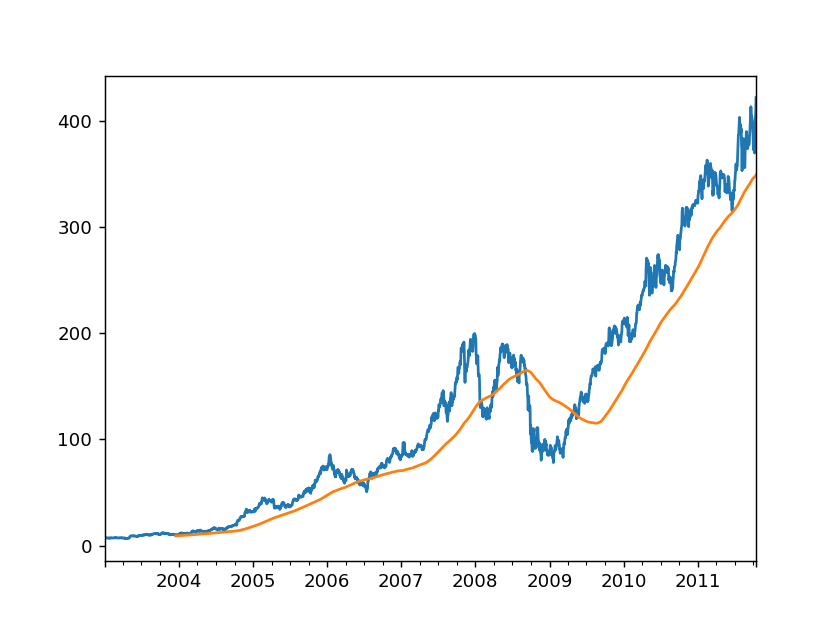

In [265]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [266]:
close_px.AAPL.plot()

In [267]:
close_px.AAPL.rolling(250).mean().plot()

In [269]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [271]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


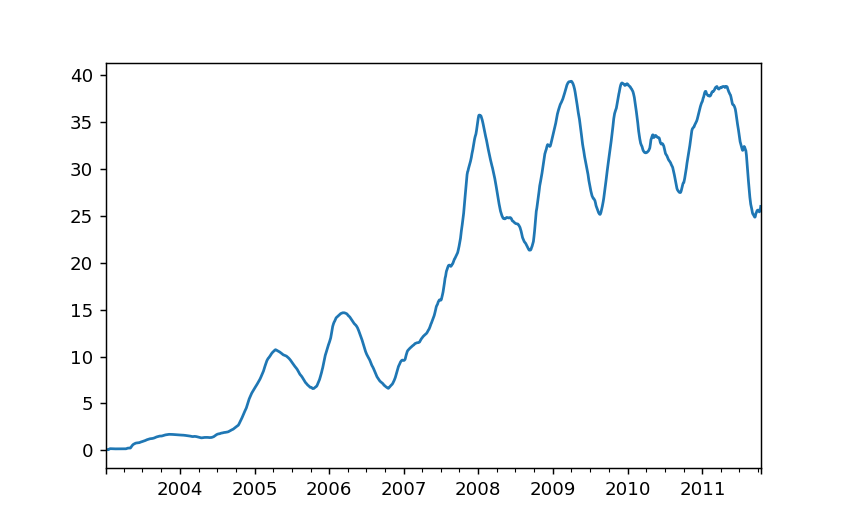

In [270]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [272]:
appl_std250.plot()

In [273]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


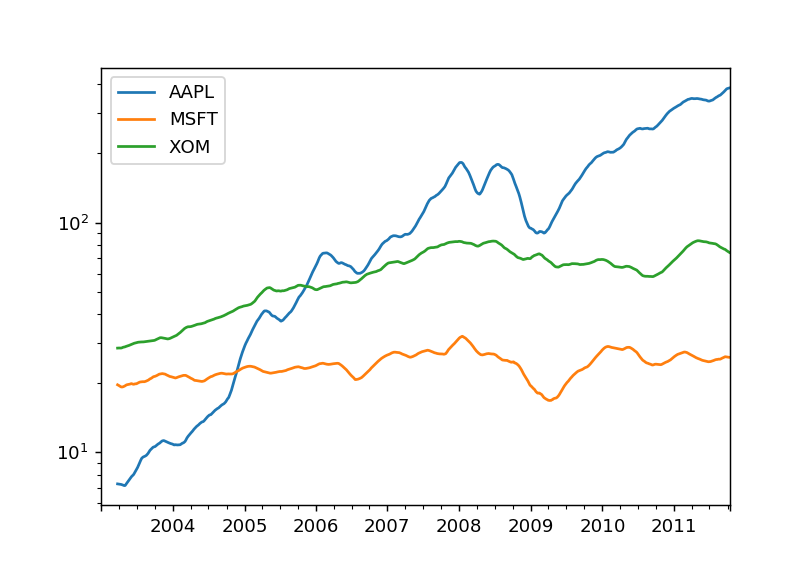

In [276]:
close_px.rolling(60).mean().plot(logy=True)

In [277]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [278]:
aapl_px = close_px.AAPL['2006':'2007']

In [280]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

<IPython.core.display.Javascript object>


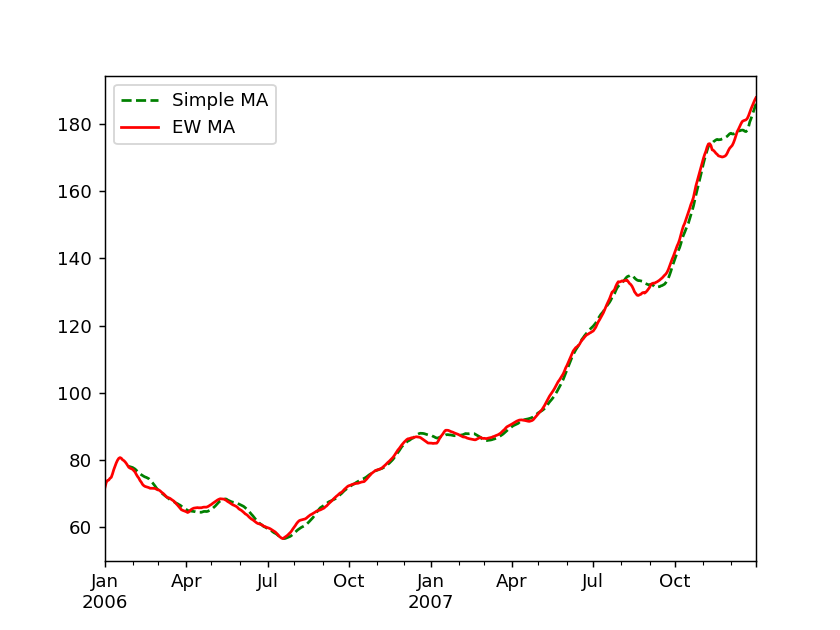

In [284]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ma60.plot(style='g--', label='Simple MA')

In [285]:
ewma60.plot(style='r-', label='EW MA')

In [286]:
plt.legend()

In [287]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


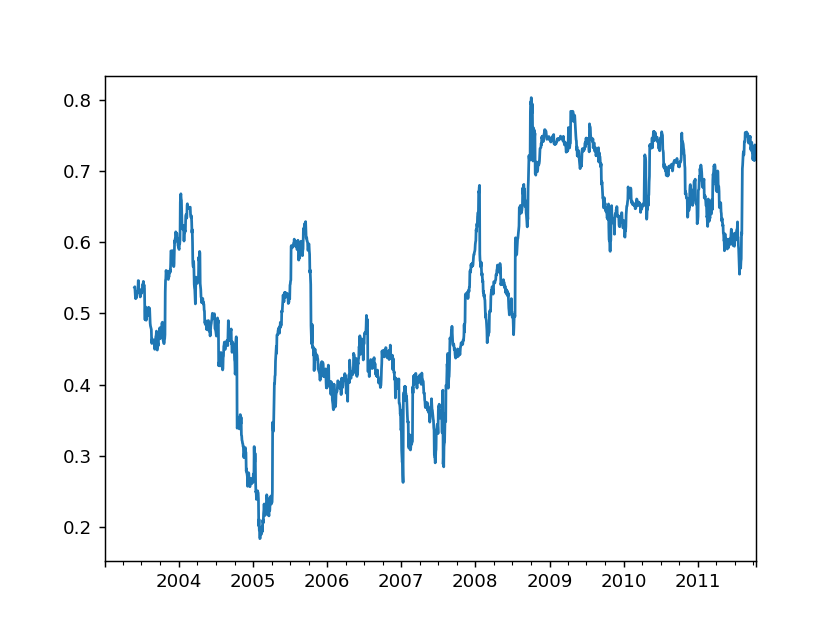

In [288]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
corr.plot()

<IPython.core.display.Javascript object>


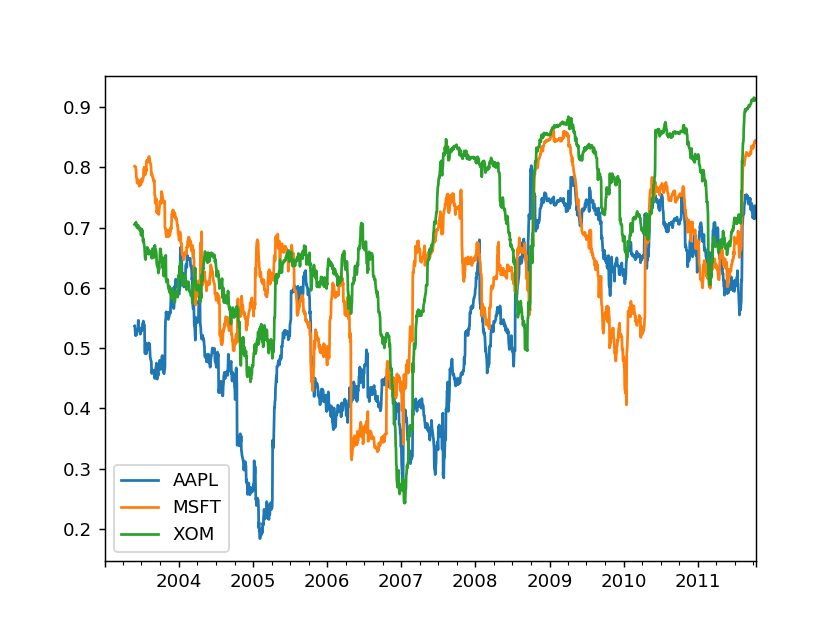

In [290]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [291]:
from scipy.stats import percentileofscore

In [294]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<IPython.core.display.Javascript object>


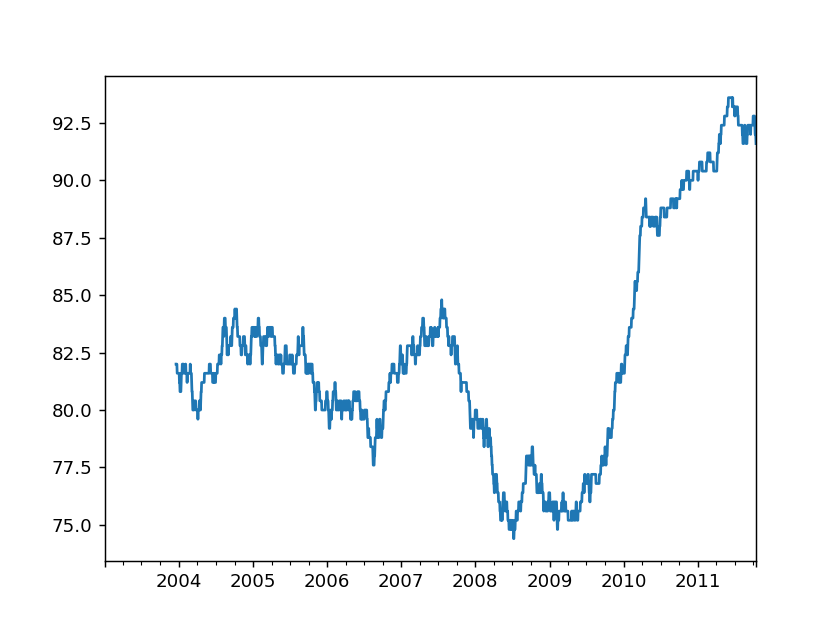

In [295]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
result.plot()